# Vectorizing Raw Data: N-Grams

This module creates a word cloud of the most prominent words, or conjunction of words.


### N-Grams 

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

### Read in text

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk
from utils import parse_xml

print(sys.version)
print(sys.executable)

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()


# Specify the path to your XML filec
xml_file_path = r'C:\dev\NLP-Sandbox\PURE\requirements-xml\0000 - cctns.xml'
# Define the namespace
namespace = {'ns': 'req_document.xsd'}

# import utils.ParseXML as ParseXML
df = parse_xml.process_xml_with_namespace(xml_file_path, namespace)
df.head(30)


3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


,tag,text,id,path
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS (CCTNS),,req_document/title/title
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DRAFT),,req_document/title/title
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title
4,version,1.0,,req_document/version
5,title,INTRODUCTION,1,req_document/p/title
6,title,The Functional Requirements Specifications (FRS) report provides the detailed description of the...,,req_document/p/text_body
7,title,FUNCTIONAL OVERVIEW,2,req_document/p/title
8,title,"CCTNS V1.0 functionality is designed to focus on delivering value to IOs, records room staff and...",,req_document/p/text_body
9,title,DESCRIPTION OF THE MODULES AND FUNCTIONAL REQUIREMENTS,3,req_document/p/title


### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [2]:
from utils import clean_data
df['cleaned_text'] = df['text'].apply(lambda x: clean_data.clean_text(x,False,False))
df['cleaned_text_old'] = df['text'].apply(lambda x: clean_data.clean_text_original(x))

# Convert the list to a string separated by spaces
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x))
df.head()

,tag,text,id,path,cleaned_text,cleaned_text_old
0,title,E-GOVERNANCE MISSION MODE PROJECT (MMP),,req_document/title/title,e-governance mission mode project mmp,egovern mission mode project mmp
1,title,CRIME & CRIMINAL TRACKING NETWORK AND SYSTEMS (CCTNS),,req_document/title/title,crime criminal tracking network and systems cctns,crime crimin track network system cctn
2,title,FUNCTIONAL REQUIREMENTS SPECIFICATION V1.0 (DRAFT),,req_document/title/title,functional requirements specification v1 0 draft,function requir specif v10 draft
3,title,MINISTRY OF HOME AFFAIRS GOVERNMENT OF INDIA,,req_document/title/title,ministry of home affairs government of india,ministri home affair govern india
4,version,1.0,,req_document/version,1 0,10


### Apply CountVectorizer (w/ N-Grams)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,4))
X_counts = ngram_vect.fit_transform(df['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(154, 11265)
['00 on' '00 on all' '00 on all weekdays' ... 'xxx days' 'xxx days per'
 'xxx days per year']


### Apply CountVectorizer (w/ N-Grams) to smaller sample

In [4]:
data_sample = df

ngram_vect_sample = CountVectorizer(ngram_range=(3,6))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names_out())

(154, 15963)
['00 on all' '00 on all weekdays' '00 on all weekdays xxx' ...
 'xx hours per rolling three month' 'xxx days per' 'xxx days per year']


In [5]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names_out()
X_counts_df

,00 on all,00 on all weekdays,00 on all weekdays xxx,00 on all weekdays xxx days,00 to xx,00 to xx 00,00 to xx 00 on,00 to xx 00 on all,10 15 seconds,10 15 seconds regardless,...,xx hours minutes,xx hours minutes per,xx hours minutes per rolling,xx hours minutes per rolling three,xx hours per,xx hours per rolling,xx hours per rolling three,xx hours per rolling three month,xxx days per,xxx days per year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from scipy.sparse import csr_matrix

# Convert X_counts_sample to a dense matrix for easier manipulation
X_counts_dense = X_counts_sample.toarray()

# Get feature names (attribute names)
feature_names = ngram_vect_sample.get_feature_names_out()

# Initialize a dictionary to store attribute sums
attribute_sums = {}

# Iterate over each attribute (column) in the dense matrix
for i, attribute_name in enumerate(feature_names):
    # Extract the i-th column (attribute) from the dense matrix
    attribute_column = X_counts_dense[:, i]
    # Calculate the sum of values in the attribute column
    attribute_sum = attribute_column.sum()
    # Store the attribute name and its sum in the dictionary
    attribute_sums[attribute_name] = attribute_sum

# Print the dictionary containing attribute names and their sums
print(attribute_sums)


{'00 on all': 1, '00 on all weekdays': 1, '00 on all weekdays xxx': 1, '00 on all weekdays xxx days': 1, '00 to xx': 1, '00 to xx 00': 1, '00 to xx 00 on': 1, '00 to xx 00 on all': 1, '10 15 seconds': 1, '10 15 seconds regardless': 1, '10 15 seconds regardless of': 1, '10 15 seconds regardless of the': 1, '10 or 20': 1, '10 or 20 maximum': 1, '10 or 20 maximum as': 1, '10 or 20 maximum as configured': 1, '12 guidance on': 1, '12 guidance on selecting': 1, '12 guidance on selecting and': 1, '12 guidance on selecting and using': 1, '14 gives guidance': 1, '14 gives guidance about': 1, '14 gives guidance about menus': 1, '14 gives guidance about menus iso': 1, '14 to iso': 1, '14 to iso 9241': 1, '14 to iso 9241 17': 1, '14 to iso 9241 17 iso': 1, '14915 should be': 1, '14915 should be taken': 1, '14915 should be taken into': 1, '14915 should be taken into account': 1, '14915 to iso': 1, '14915 to iso 14915': 1, '14915 to iso 14915 should': 1, '14915 to iso 14915 should be': 1, '15 about 

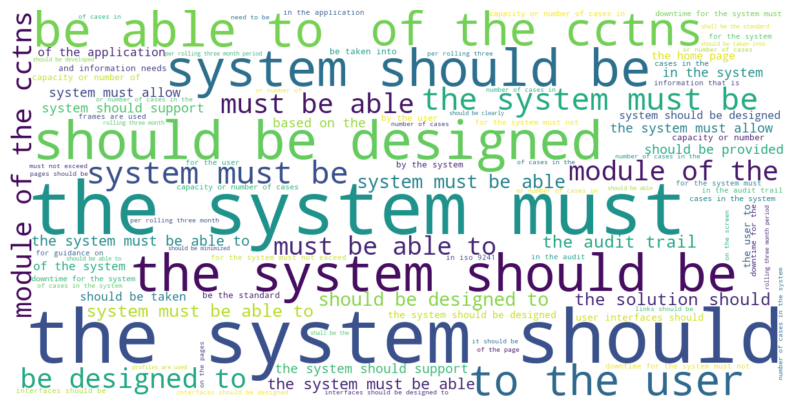

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sort the attribute_sums dictionary by values in descending order
sorted_attributes = sorted(attribute_sums.items(), key=lambda x: x[1], reverse=True)

# Extract the top grams and their frequencies
words = dict(sorted_attributes[:100])

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(words)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()
